# Numpy Crash Course

In [71]:
from skimage import data
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.size"] = 18
matplotlib.rcParams["figure.figsize"] = (12, 10)

camera = data.camera()

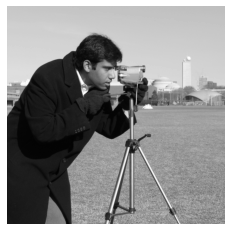

In [61]:
def plot_img(image):
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()

plot_img(camera)

In [3]:
# numpy.ndarray
type(camera)

numpy.ndarray

In [4]:
# pixel geometry
camera.shape

(512, 512)

In [5]:
# number of pixels
camera.size

262144

In [6]:
# info about pixel intensity
camera.min(), camera.max()

(0, 255)

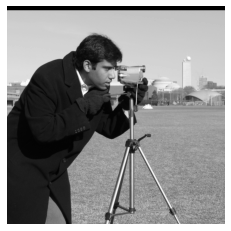

In [7]:
# indexing row and column --> top left is 0,0
camera[10,20]
camera[3, 10] = 0
camera[:10] = 0
camera

plot_img(camera)

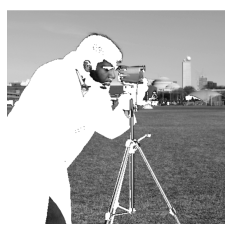

In [8]:
# masking --> indexing with booleans
mask = camera < 87
# set pixel to white where mask is true
camera[mask] = 255

plot_img(camera)

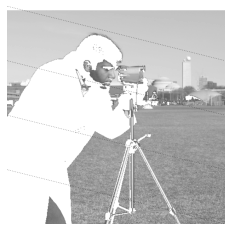

In [9]:
# fancy masking
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

plot_img(camera)

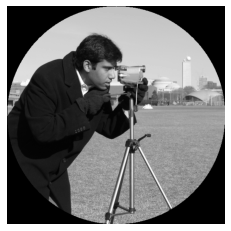

In [10]:
# more fancy masking
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols /2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)

camera = data.camera()
camera[outer_disk_mask] = 0
plot_img(camera)

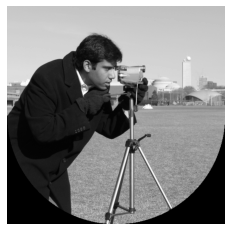

In [11]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)

camera = data.camera()
camera[lower_half_disk] = 0
plot_img(camera)

In [12]:
# color images --> trailing channels, but still 2D
cat = data.chelsea()
print(type(cat))
print(cat.shape)

<class 'numpy.ndarray'>
(300, 451, 3)


In [13]:
# RGB at pixel location, 8bit unsigned int
cat[10,20]

array([151, 129, 115], dtype=uint8)

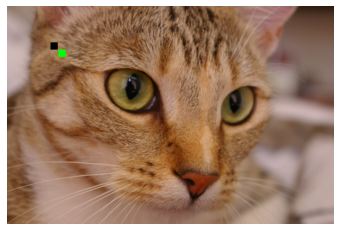

In [14]:
# pixel = [red, green, blue]
cat[50:60,60:70] = 0
cat[60:70,71:81] = [0, 255, 0]
plot_img(cat)

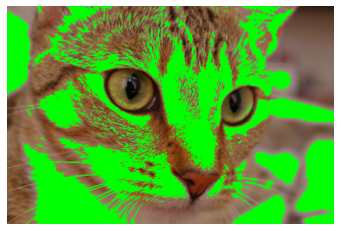

In [15]:
# boolean mask with 2D color
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plot_img(cat)

(100, 100)
14147


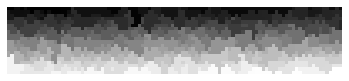

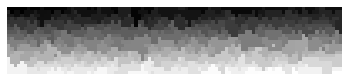

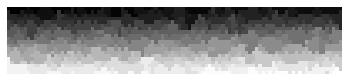

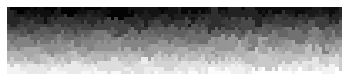

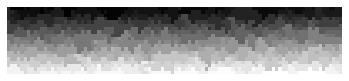

In [40]:
# extras on 3D images
from skimage import segmentation
from scipy import ndimage as ndi

im3d = np.random.rand(20, 100, 100)
seeds, features, = ndi.label(im3d < 0.1)
print(seeds[0].shape)
print(features)

we = segmentation.watershed(im3d, seeds)

for i in range(5):
    plot_img(we[:,:,i])

# Image Data Types

In [45]:
# for images allowed float range is between [-1,1] or [0,1]
# out of range floats will be converted

from skimage.util import img_as_float

image = np.arange(0,50,10,dtype=np.uint8)

print(image.astype('float'))
print(img_as_float(image))


[ 0. 10. 20. 30. 40.]
[0.         0.03921569 0.07843137 0.11764706 0.15686275]


In [46]:
# functions to convert images to dtype and rescale
from skimage.util import img_as_ubyte

image = np.array([0, 0.5, 1], dtype=float)
img_as_ubyte(image)

array([  0, 128, 255], dtype=uint8)

In [47]:
# dtype conversion can result in precision loss
image = np.array([0, 0.503, 1], dtype=float)
img_as_ubyte(image)

array([  0, 128, 255], dtype=uint8)

In [58]:
# preserve range of data after dtype conversion
# data may be a physical measurement... rainfall, velocity

from skimage import data
from skimage.transform import rescale

def img_info(image):
    print(image.dtype, image.min(), image.max(), image.shape)

image = data.coins()
img_info(image)

rescaled = rescale(image, scale=0.5)
img_info(rescaled)

rescaled_preserve = rescale(image, scale=0.5, preserve_range=True)
img_info(rescaled_preserve)


uint8 1 252 (303, 384)
float64 0.01568627450980303 0.9113906088751303 (152, 192)
float64 3.9999999999997726 232.40460526315823 (152, 192)


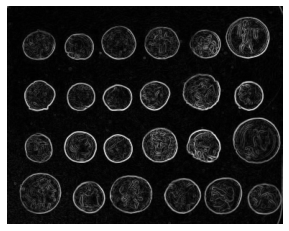

In [62]:
# dtype conversions can be used to specify image output types after processing
from skimage.util import img_as_uint
from skimage.filters import sobel

out = img_as_uint(sobel(image))

plot_img(out)

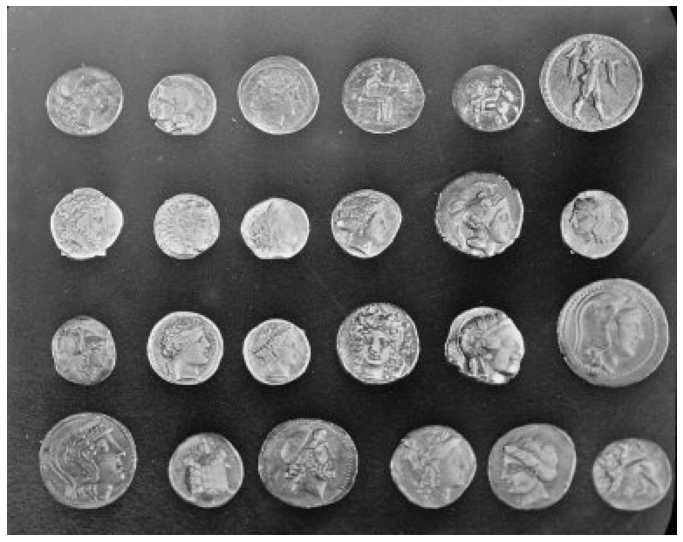

In [85]:
# rescaling intensity values --> load a 10, 12, 16bit image
# this is advanced, something to consider...
# will need to specify a conversion expression with in_range

from skimage import exposure
from skimage import data

image = data.coins()
image = exposure.rescale_intensity(image, in_range=(0, 2**10 - 1))
plot_img(image)

In [ ]:
ndi.label?

In [ ]:
segmentation.watershed?

In [ ]:
np.logical_and?